<a href="https://colab.research.google.com/github/ishitvamishra/Unsupervised-Learning/blob/main/Anomaly_Detection_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       0.86      0.80      0.83        15

    accuracy                           0.98       315
   macro avg       0.92      0.90      0.91       315
weighted avg       0.98      0.98      0.98       315



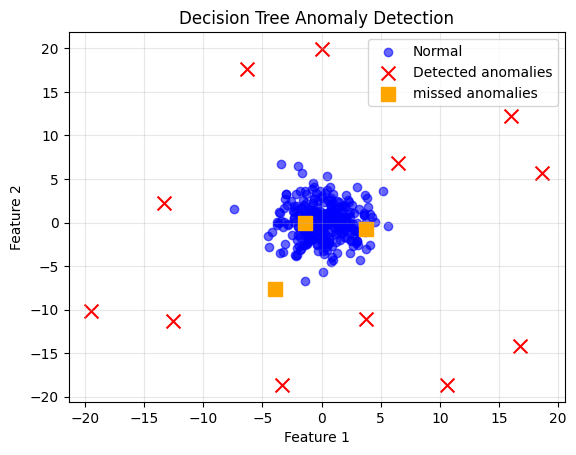

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

normal_data = np.random.normal(0,2,(1000,2))
anomaly_data = np.random.uniform(-20,20,(50,2))

data = np.vstack((normal_data,anomaly_data))

labels = np.array([0]*1000+[1]*50)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

model = DecisionTreeClassifier(max_depth = 10, random_state= 42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Classification Report")

print(classification_report(y_test, predictions))

normal_mask = (y_test == 0)
plt.scatter(X_test[normal_mask, 0], X_test[normal_mask, 1], c='blue', label="Normal", alpha=0.6)

correct_anomalies = (y_test == 1) & (predictions == 1)
plt.scatter(X_test[correct_anomalies, 0], X_test[correct_anomalies, 1], c='red', label="Detected anomalies", marker= 'x', s=100)

missed_anomalies = (y_test == 1) & (predictions == 0)
plt.scatter(X_test[missed_anomalies, 0], X_test[missed_anomalies, 1], c= 'orange', label= "missed anomalies", marker = 's', s=100)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Anomaly Detection")
plt.legend()
plt.grid(True, alpha= 0.3)
plt.show()






